# Lesson 2 Basic Examples

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

from topfarm import TopFarmProblem
from topfarm.plotting import XYPlotComp
from topfarm.constraint_components.boundary import XYBoundaryConstraint, CircleBoundaryConstraint
from topfarm.constraint_components.spacing import SpacingConstraint
from topfarm.cost_models.cost_model_wrappers import CostModelComponent

print("Imports OK ")

Imports OK 


Pomyślny import bibliotek i komunikat „Imports OK” to sygnał, że środowisko projektowe jest gotowe do pracy. Zaimportowanie takich elementów jak XYBoundaryConstraint czy SpacingConstraint oznacza, że mamy gotowe mechanizmy do pilnowania granic działki oraz bezpiecznych odległości między turbinami, co jest kluczowe dla uniknięcia strat aerodynamicznych i zapewnienia bezpieczeństwa konstrukcji. Dzięki obiektowi TopFarmProblem wszystkie te fizyczne ograniczenia zostaną połączone w jeden spójny projekt, co pozwala na przejście od kwestii informatycznych bezpośrednio do właściwego modelowania farmy wiatrowej.

Rozpoczęcie pracy od Copilot Chat oraz dokumentacji TopFarm2 to kluczowy etap przygotowania, który pozwala zrozumieć zasady działania algorytmów w kontekście fizycznych ograniczeń terenu, takich jak granice działki czy minimalne odstępy między turbinami. Wykorzystanie sztucznej inteligencji służy tu jako wsparcie w szybkim tłumaczeniu założeń technicznych na język Python, co minimalizuje błędy programistyczne i pozwala skupić się na merytorycznych aspektach projektu.

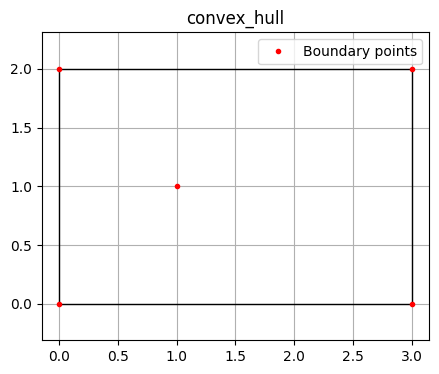

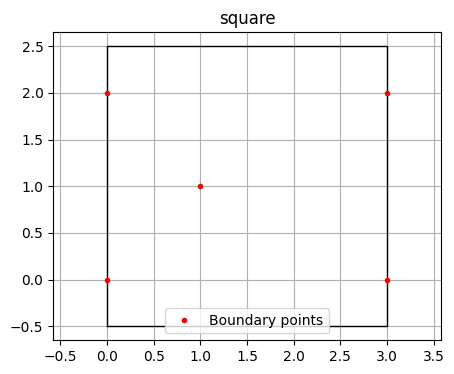

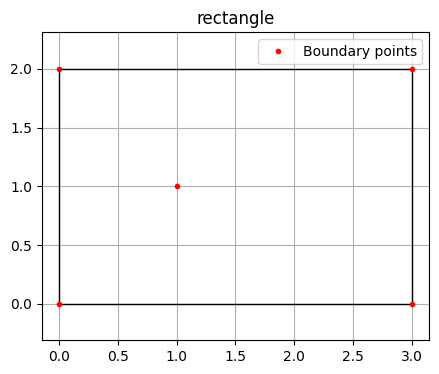

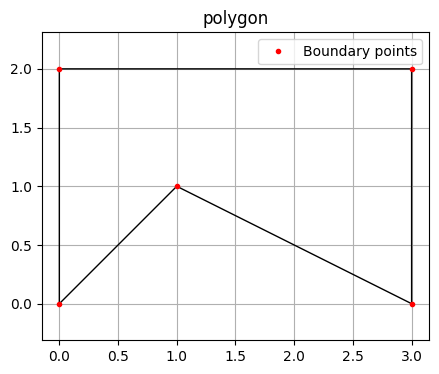

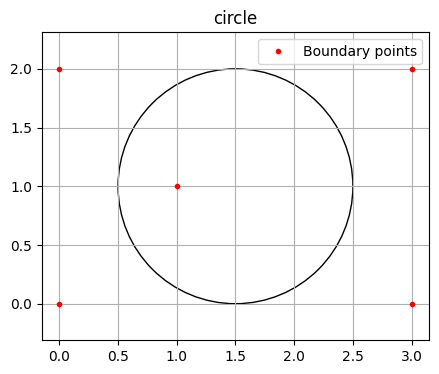

In [ ]:
boundary = np.array([(0, 0), (1, 1), (3, 0), (3, 2), (0, 2)])

x = [0.5, 1.5]
y = [0.5, 1.5]

dummy_cost = CostModelComponent(
    input_keys=[],
    n_wt=2,
    cost_function=lambda: 1
)

def plot_boundary(name, constraint_comp):
    tf = TopFarmProblem(
        design_vars={'x': x, 'y': y},
        cost_comp=dummy_cost,
        constraints=[constraint_comp],
        plot_comp=XYPlotComp()
    )
    plt.figure(figsize=(5, 4))
    plt.title(name)
    tf.plot_comp.plot_constraints()
    plt.plot(boundary[:, 0], boundary[:, 1], '.r', label='Boundary points')
    plt.axis("equal")
    plt.grid(True)
    plt.legend()

plot_boundary('convex_hull', XYBoundaryConstraint(boundary, 'convex_hull'))
plot_boundary('square',      XYBoundaryConstraint(boundary, 'square'))
plot_boundary('rectangle',   XYBoundaryConstraint(boundary, 'rectangle'))
plot_boundary('polygon',     XYBoundaryConstraint(boundary, 'polygon'))
plot_boundary('circle',      CircleBoundaryConstraint((1.5, 1), 1))

W tej części ćwiczenia przeanalizowaliśmy pięć metod definiowania granic farmy wiatrowej, co w rzeczywistym procesie projektowym pozwala na ścisłe dopasowanie obszaru inwestycji do kształtu posiadanych działek. Wykorzystane modele, takie jak polygon, convex_hull, square, rectangle oraz circle, różnią się znacząco stopniem dopasowania do punktów: wielokąt precyzyjnie odwzorowuje nieregularny kształt terenu, otoczka wypukła (convex hull) tworzy najmniejszy możliwy obszar domknięty, natomiast granice kwadratowe i prostokątne upraszczają teren do form regularnych. Zastosowanie granicy kołowej (circle) pokazuje z kolei możliwość wyznaczenia strefy buforowej wokół konkretnego punktu centralnego.

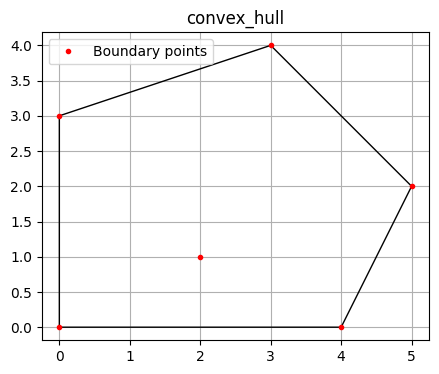

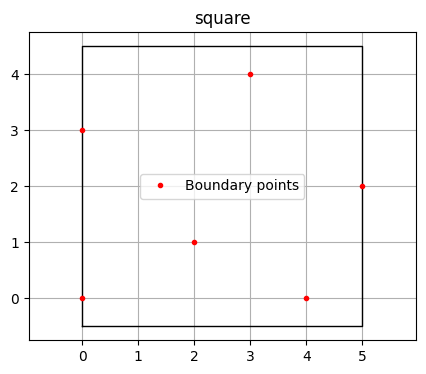

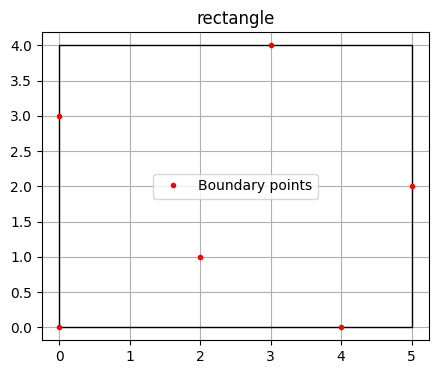

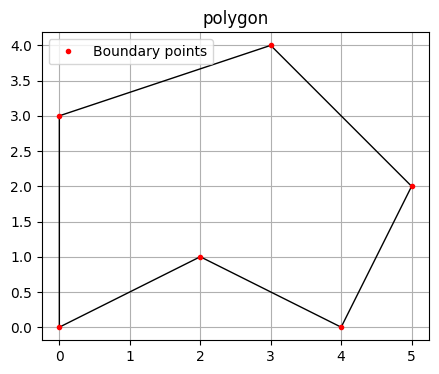

In [70]:
boundary = np.array([
    (0, 0),
    (2, 1),
    (4, 0),
    (5, 2),
    (3, 4),
    (0, 3)
])

for boundary_type in ['convex_hull', 'square', 'rectangle', 'polygon']:
    plot_boundary(boundary_type, XYBoundaryConstraint(boundary, boundary_type))

Porównanie różnych typów perymetru na nieregularnym kształcie pokazało różnicę między modelem polygon a convex_hull. Wielokąt (polygon) precyzyjnie odwzorowuje kształt działki wraz z jej wcięciami, co w praktyce odpowiada rzeczywistym granicom prawnym terenu. Z kolei otoczka wypukła (convex_hull) upraszcza ten obszar, ignorując zagłębienia, co mogłoby doprowadzić do błędnego umieszczenia turbin na terenach poza naszą własnością.

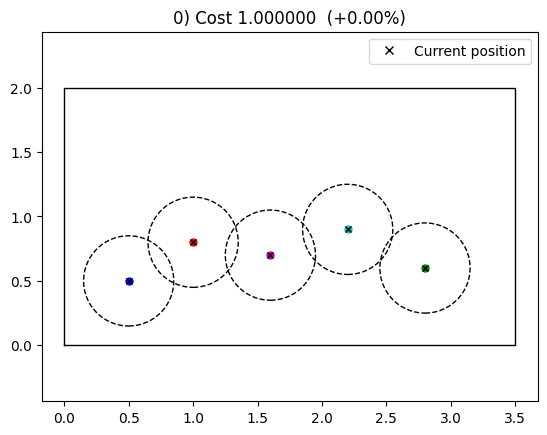

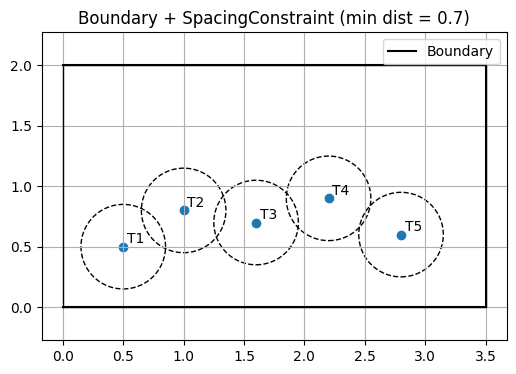

In [ ]:
x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])

boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

dummy_cost5 = CostModelComponent(input_keys=[], n_wt=5, cost_function=lambda: 1)

spacing = 0.7
tf = TopFarmProblem(
    design_vars={'x': x5, 'y': y5},
    cost_comp=dummy_cost5,
    constraints=[
        XYBoundaryConstraint(boundary_big, 'polygon'),
        SpacingConstraint(spacing)
    ],
    plot_comp=XYPlotComp()
)

tf.setup()
tf.evaluate()

plt.figure(figsize=(6, 4))
plt.title(f"Boundary + SpacingConstraint (min dist = {spacing})")
tf.plot_comp.plot_constraints()
plt.plot(boundary_big[:, 0], boundary_big[:, 1], '-k', label='Boundary')
plt.scatter(x5, y5)
for i, (xx, yy) in enumerate(zip(x5, y5), start=1):
    plt.text(xx + 0.03, yy + 0.03, f"T{i}")
plt.axis("equal")
plt.grid(True)
plt.legend()

Parametr SpacingConstraint wyznacza minimalne bezpieczne odległości między turbinami, co jest niezbędne dla redukcji strat wynikających z turbulencji i efektu cienia aerodynamicznego. Na wizualizacji zwiększanie wartości spacing powiększa okręgi ochronne wokół wież. Ich wzajemne nachodzenie sygnalizuje, że układ narusza techniczne zasady projektowe.

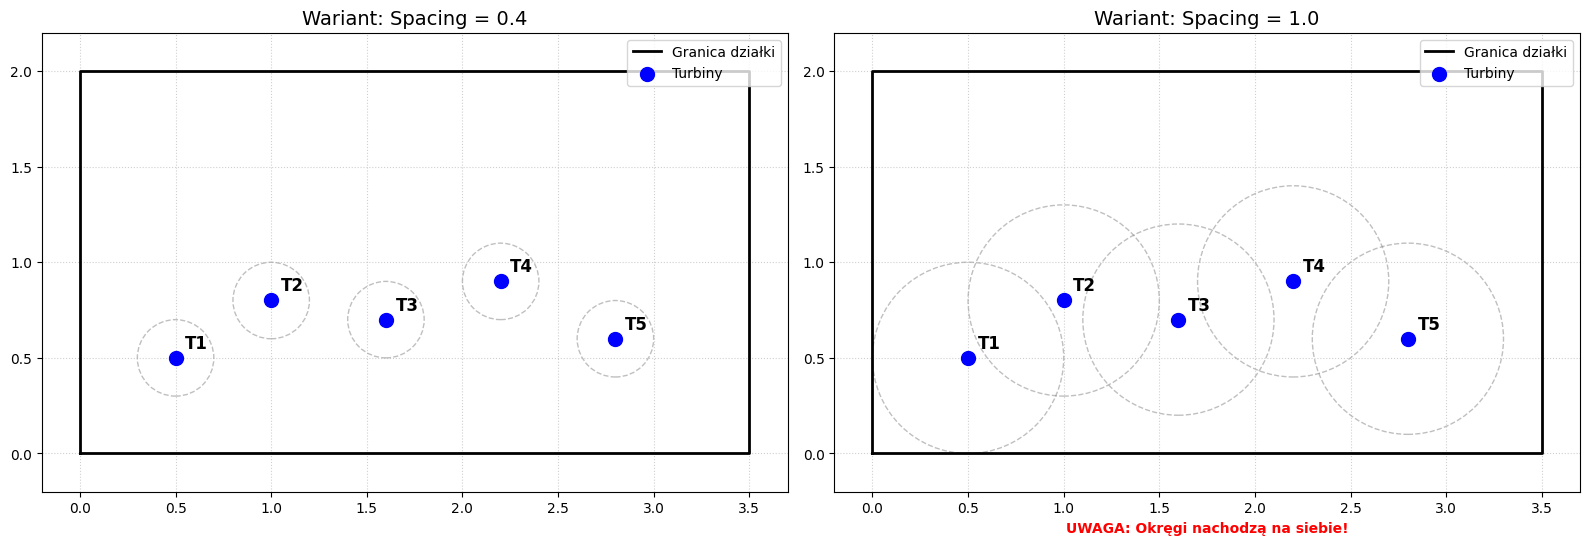

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

x5 = np.array([0.5, 1.0, 1.6, 2.2, 2.8])
y5 = np.array([0.5, 0.8, 0.7, 0.9, 0.6])
boundary_big = np.array([(0, 0), (3.5, 0), (3.5, 2), (0, 2)])

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 7))
spacings = [0.4, 1.0]
axes = [ax1, ax2]

for ax, s in zip(axes, spacings):
    b_plot = np.vstack([boundary_big, boundary_big[0]])
    ax.plot(b_plot[:, 0], b_plot[:, 1], 'k-', lw=2, label='Granica działki')
    
    for xi, yi in zip(x5, y5):
        circle = plt.Circle((xi, yi), s/2, color='gray', fill=False, linestyle='--', alpha=0.5)
        ax.add_patch(circle)
        
    ax.scatter(x5, y5, color='blue', s=100, zorder=3, label='Turbiny')
    
    for i, (xi, yi) in enumerate(zip(x5, y5), start=1):
        ax.text(xi + 0.05, yi + 0.05, f"T{i}", fontsize=12, fontweight='bold')
    
    ax.set_title(f"Wariant: Spacing = {s}", fontsize=14)
    if s == 1.0:
        ax.set_xlabel("UWAGA: Okręgi nachodzą na siebie!", color='red', fontweight='bold')
    
    ax.set_aspect('equal')
    ax.grid(True, linestyle=':', alpha=0.6)
    ax.set_xlim(-0.2, 3.7)
    ax.set_ylim(-0.2, 2.2)
    ax.legend(loc='upper right')

plt.tight_layout()
plt.show()

Wykorzystanie subplotów pozwoliło na bezpośrednie porównanie wpływu odstępów (spacing) na układ farmy. Przy wartości 0.4 strefy bezpieczeństwa są zachowane, natomiast przy 1.0 okręgi wyraźnie nachodzą na siebie, co sygnalizuje błąd projektowy. W praktyce taka kolizja oznacza ryzyko wystąpienia niszczących turbulencji i strat energii (efekt cienia). Wizualizacja ta umożliwia błyskawiczną weryfikację założeń technicznych przed uruchomieniem algorytmów optymalizacyjnych

Najważniejszym wynikiem było opanowanie metod definiowania i wizualizacji istotnych ograniczeń przestrzennych farmy wiatrowej przy użyciu BoundaryConstraint oraz SpacingConstraint. Z punktu widzenia projektowania i budowy farmy, umiejętność ta pozwala na natychmiastową weryfikację poprawności układu turbin względem granic prawnych działki oraz bezpieczeństwa aerodynamicznego (unikanie efektu cienia). Przeprowadzone symulacje pokazały, że graficzna analiza wariantów pozwala wykryć błędy projektowe jeszcze przed etapem kosztownej optymalizacji.